## Digit Recognizer

- about competition: https://www.kaggle.com/c/digit-recognizer
- data: https://www.kaggle.com/c/digit-recognizer/data
- leaderboard: https://www.kaggle.com/c/digit-recognizer/leaderboard
- my best submission: https://www.kaggle.com/c/digit-recognizer/leaderboard?submissionId=3335474 96.571% (Random Forest)

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt

%matplotlib inline

Get Data

In [23]:
df_train_src = pd.read_csv('data/train.csv')
df_test_src = pd.read_csv('data/test.csv')

print df_train_src.info()
df_train_src.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y = df_train_src.pop('label').values
X = df_train_src.values

### Plot the data

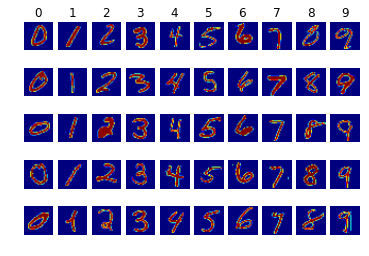

In [25]:
classes = range(0,10)
num_classes = len(classes)
samples = 5

for e, cls in enumerate(classes):
    idxs = np.nonzero([sample == e for sample in y])
    idxs = np.random.choice(idxs[0], samples, replace=False)
    for i , idx in enumerate(idxs):
        plt_idx = i * num_classes + e + 1
        plt.subplot(samples, num_classes, plt_idx)
        plt.imshow(X[idx].reshape((28, 28)))
        plt.axis("off")
        if i == 0:
            plt.title(cls)

plt.show()

### Random Forest

In [11]:
rf = RandomForestClassifier(n_estimators = 200)

rf.fit(X, y)
print 'cross validation score: {}'.format(cross_val_score(rf, X, y))

cross validation score: [ 0.96251071  0.96263752  0.96635234]


Submission

In [16]:
model.fit(X, y)
submission = pd.DataFrame({
        'ImageId': range(1, df_test_src.shape[0] + 1),
        'Label': rf.predict(df_test_src.values)
    })
submission.to_csv('submissions/submission_20160813_1843_rf.csv', index=False) # 96.571%